In [55]:
!wget https://github.com/dhrim/deep_learning_data/raw/master/commodity.zip

--2022-01-10 05:31:22--  https://github.com/dhrim/deep_learning_data/raw/master/commodity.zip
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/deep_learning_data/master/commodity.zip [following]
--2022-01-10 05:31:22--  https://raw.githubusercontent.com/dhrim/deep_learning_data/master/commodity.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1835488 (1.8M) [application/zip]
Saving to: ‘commodity.zip.2’

commodity.zip.2     100%[===================>]   1.75M  --.-KB/s    in 0.07s   

2022-01-10 05:31:22 (23.9 MB/s) - ‘commodity.zip.2’ saved [1835488/1835488]



In [56]:
!rm -rf commodity
!unzip commodity.zip

Archive:  commodity.zip
   creating: commodity/
  inflating: commodity/Natural Gas.csv  
  inflating: commodity/Soybean.csv   
  inflating: commodity/Gold.csv      
  inflating: commodity/Platinum.csv  
  inflating: commodity/Heating Oil.csv  
  inflating: commodity/Palladium.csv  
  inflating: commodity/Silver.csv    
  inflating: commodity/Lumber.csv    
  inflating: commodity/Lean Hogs.csv  
  inflating: commodity/Soybean Meal.csv  
  inflating: commodity/Copper.csv    
  inflating: commodity/Live Cattle.csv  
  inflating: commodity/Soybean Oil.csv  
  inflating: commodity/Brent Crude Oil.csv  
  inflating: commodity/Cotton.csv    
  inflating: commodity/RBOB Gasoline.csv  
  inflating: commodity/Oat.csv       
  inflating: commodity/Coffee.csv    
  inflating: commodity/Wheat.csv     
  inflating: commodity/Sugar.csv     
  inflating: commodity/Corn.csv      
  inflating: commodity/Crude Oil.csv  
  inflating: commodity/Cocoa.csv     
  inflating: commodity/Feeder Cattle.csv  


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
SEQUENCE_LENGTH = 10
OFFSET = 1
BATCH_SIZE = 32

In [59]:
dfG= pd.read_csv("commodity/Gold.csv")
dfG.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0.0
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0.0
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0.0
3,2000-09-04,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2.0


In [60]:
print(len(dfG))

5291


In [61]:
dfG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5291 entries, 0 to 5290
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5291 non-null   object 
 1   Open       5179 non-null   float64
 2   High       5179 non-null   float64
 3   Low        5179 non-null   float64
 4   Close      5179 non-null   float64
 5   Adj Close  5179 non-null   float64
 6   Volume     5179 non-null   float64
dtypes: float64(6), object(1)
memory usage: 289.5+ KB


In [62]:
dfG.isnull().sum()

Date           0
Open         112
High         112
Low          112
Close        112
Adj Close    112
Volume       112
dtype: int64

In [63]:
dfG = dfG.dropna()

In [64]:
dfG.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [65]:
dfG.sort_values(by=["Date"])

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0.0
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0.0
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0.0
4,2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2.0
5,2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0.0
...,...,...,...,...,...,...,...
5286,2021-06-03,1908.800049,1908.800049,1865.000000,1871.199951,1871.199951,1021.0
5287,2021-06-04,1869.300049,1895.500000,1854.000000,1889.800049,1889.800049,367.0
5288,2021-06-07,1890.500000,1899.699951,1883.199951,1896.800049,1896.800049,87.0
5289,2021-06-08,1896.500000,1902.900024,1890.000000,1892.199951,1892.199951,930.0


In [66]:
sorted_index = dfG.sort_values(by=["Date"]).index
print(sorted_index)
print(sorted_index - dfG.index)
print(sum(sorted_index - dfG.index))

Int64Index([   0,    1,    2,    4,    5,    6,    7,    8,    9,   10,
            ...
            5281, 5282, 5283, 5284, 5285, 5286, 5287, 5288, 5289, 5290],
           dtype='int64', length=5179)
Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', length=5179)
0


In [67]:
dfG2 = dfG.drop(columns=["Date", "Adj Close"])

Open


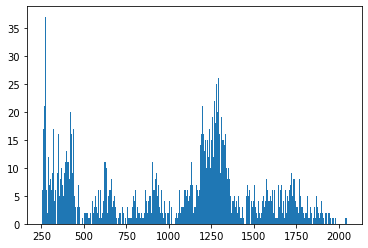

High


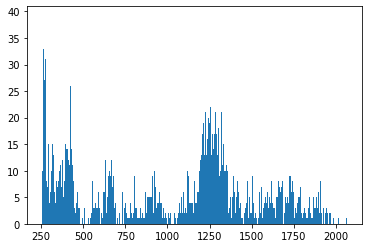

Low


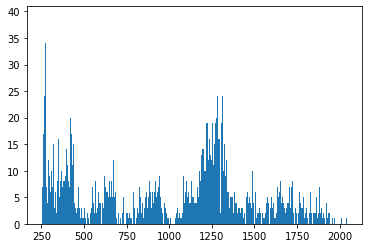

Close


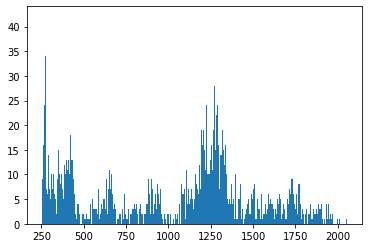

Volume


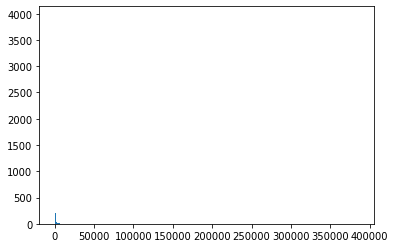

In [68]:
for i in range(len(dfG2.columns)):
    print(dfG2.columns[i])
    plt.hist(dfG2.iloc[:,i], bins=1000)
    plt.show()

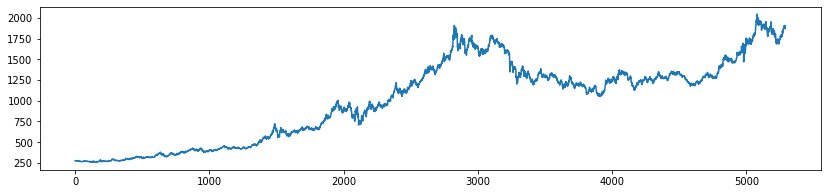

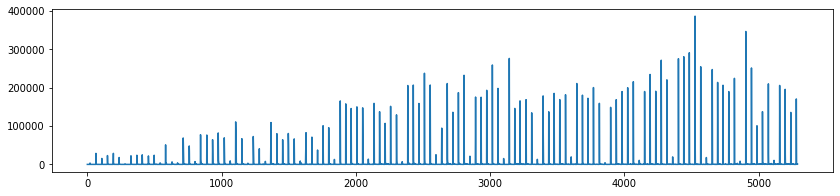

In [88]:
plt.figure(figsize=(14,3))
plt.plot(dfG2.iloc[:,0])
plt.show()

plt.figure(figsize=(14,3))
plt.plot(dfG2.iloc[:,4])
plt.show()

In [72]:
raw_data = dfG2.to_numpy()
print(raw_data.shape)

(5179, 5)


In [73]:
print(raw_data[:5])

[[273.899994 273.899994 273.899994 273.899994   0.      ]
 [274.799988 278.299988 274.799988 278.299988   0.      ]
 [277.       277.       277.       277.         0.      ]
 [275.799988 275.799988 275.799988 275.799988   2.      ]
 [274.200012 274.200012 274.200012 274.200012   0.      ]]


In [74]:
maxs = raw_data.max(axis=0)
print(maxs)
mins = raw_data.min(axis=0)
print(mins)

[  2045.5   2063.    2040.    2051.5 386334. ]
[255.       256.100006 255.       255.100006   0.      ]


In [75]:
normalized = (raw_data - mins) / (maxs - mins)
print(normalized[:5])

[[1.05557073e-02 9.85111963e-03 1.05882319e-02 1.04653685e-02
  0.00000000e+00]
 [1.10583569e-02 1.22862262e-02 1.10924303e-02 1.29147083e-02
  0.00000000e+00]
 [1.22870707e-02 1.15667685e-02 1.23249300e-02 1.21910455e-02
  0.00000000e+00]
 [1.16168601e-02 1.09026410e-02 1.16526543e-02 1.15230361e-02
  5.17686768e-06]
 [1.07232684e-02 1.00171598e-02 1.07563092e-02 1.06323792e-02
  0.00000000e+00]]


In [76]:
preprocessed = normalized

In [77]:
numbers = preprocessed

In [80]:
raw_x = []
raw_y = []

for i in range(len(numbers)):
  if i+SEQUENCE_LENGTH+OFFSET >= len(numbers): break
  raw_x.append(numbers[i:i+SEQUENCE_LENGTH,:])
  raw_y.append(numbers[i+SEQUENCE_LENGTH+OFFSET-1,:])

In [81]:
x = np.array(raw_x)
y = np.array(raw_y)
print(x.shape)
print(y.shape)

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, shuffle=True)


print("Training Data:")
print(train_x.shape)
print(train_y.shape)

print("Test Data:")
print(test_x.shape)
print(test_y.shape)

(5168, 10, 5)
(5168, 5)
Training Data:
(4651, 10, 5)
(4651, 5)
Test Data:
(517, 10, 5)
(517, 5)


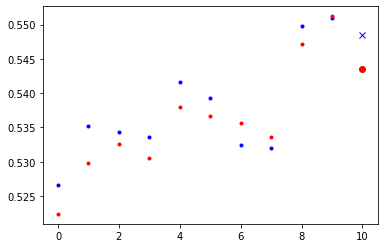

In [82]:
# print("train_x[0]\n", train_x[0])
# print()
# print("train_y[0]\n", train_y[0])

plt.plot(train_x[0].T[0], '.', color='blue')
plt.plot([len(train_x[0])], train_y[0,0], 'x', color='blue')
plt.plot(train_x[0].T[1], '.', color='red')
plt.plot([len(train_x[0])], train_y[0,1], 'o', color='red')

plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               68608     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 5)                 645       
                                                                 
Total params: 69,253
Trainable params: 69,253
Non-trainable params: 0
_________________________________________________________________


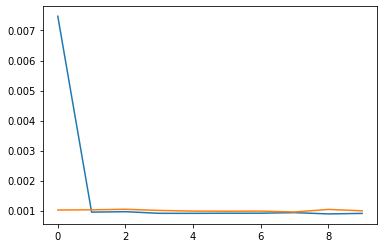

17/17 [==============================] - 0s 2ms/step - loss: 8.9411e-04 - mape: 130503.3828
loss= 0.0008941131527535617
mape= 130503.3828125


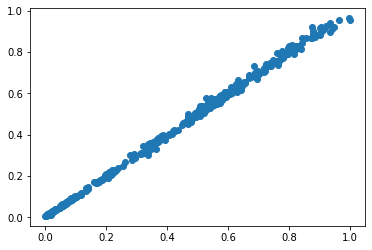

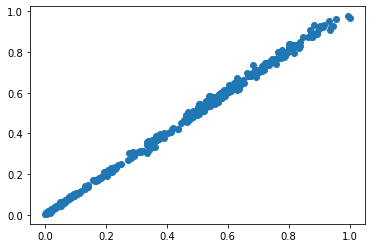

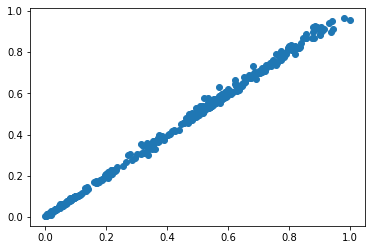

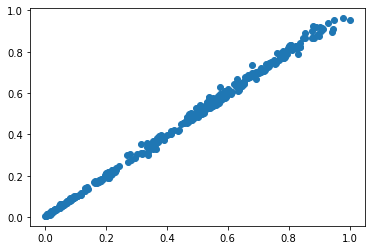

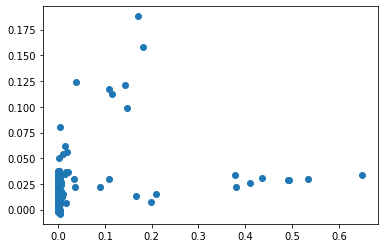

In [83]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
output_shape = train_y.shape[-1]

model = keras.Sequential()
model.add(LSTM(128, input_shape=input_shape))
model.add(Flatten())
model.add(Dense(output_shape))
model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=BATCH_SIZE)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)



y_ = model.predict(test_x).squeeze()
for i in range(output_shape):
    plt.scatter(test_y[:,i], y_[:,i])
    plt.show()

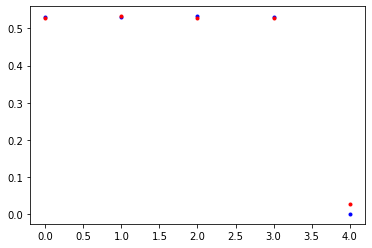

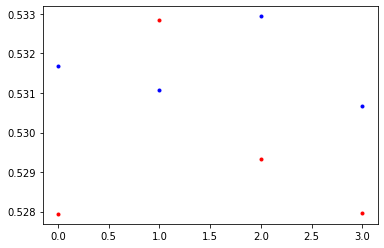

In [84]:
plt.plot(test_y[0], 'b.')
plt.plot(y_[0], 'r.')
plt.show()

plt.plot(test_y[0,:-1], 'b.')
plt.plot(y_[0,:-1], 'r.')
plt.show()

In [85]:
denomalized_test_y = test_y * (maxs - mins) + mins
denomalized_y_ = y_ * (maxs - mins) + mins

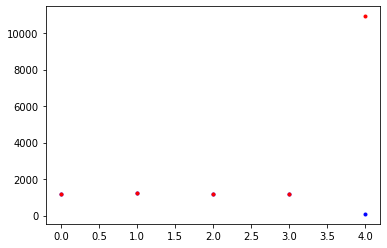

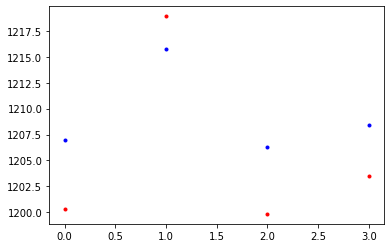

In [86]:
plt.plot(denomalized_test_y[0], 'b.')
plt.plot(denomalized_y_[0], 'r.')
plt.show()

plt.plot(denomalized_test_y[0,:-1], 'b.')
plt.plot(denomalized_y_[0,:-1], 'r.')
plt.show()